  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Thomas\AppData\Local\Temp\ipykernel_13888\964696172.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


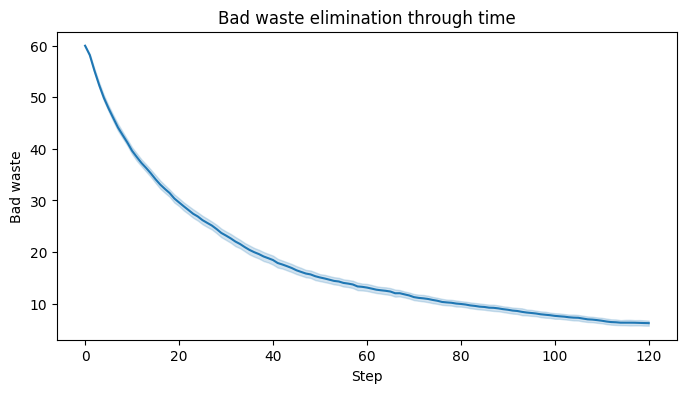

In [8]:
import mesa
from robots.model import Robots
import pandas as pd
import seaborn as sns

def batch_run():
    params = {"initial_robots": 10, "initial_wastes": 20}

    results_5s = mesa.batch_run(
        Robots,
        parameters=params,
        iterations=100,
        max_steps=300,
        number_processes=10,
        data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
        display_progress=True,
    )

    results_5s_df = pd.DataFrame(results_5s)
    # Create a lineplot with error bars
    g = sns.lineplot(
        data=results_5s_df,
        x="Step",
        y="Waste not processed",
        errorbar=("ci", 95),
        palette="tab10",
    )
    g.figure.set_size_inches(8, 4)
    plot_title = "Bad waste elimination through time"
    g.set(title=plot_title, ylabel="Waste not processed")


batch_run()
